In [71]:
import pandas as pd

In [72]:
# 尝试自动检测正确的分隔符
df = pd.read_csv('data.csv', sep=";", engine="python")

# 再次查看数据类型和前几行
df_info = df.dtypes
df_head = df.head()

df_info, df_head

(Marital status                                      int64
 Application mode                                    int64
 Application order                                   int64
 Course                                              int64
 Daytime/evening attendance\t                        int64
 Previous qualification                              int64
 Previous qualification (grade)                    float64
 Nacionality                                         int64
 Mother's qualification                              int64
 Father's qualification                              int64
 Mother's occupation                                 int64
 Father's occupation                                 int64
 Admission grade                                   float64
 Displaced                                           int64
 Educational special needs                           int64
 Debtor                                              int64
 Tuition fees up to date                             int

In [73]:
df_head

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [74]:
X["Course"] = X["Course"].astype("category")

In [75]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# 识别所有分类变量（object 类型的列）
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# 使用 Label Encoding 将所有分类变量转换为数值
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # 存储编码器以备将来解码

# 选择自变量（X）和因变量（Y）
X = df.drop(columns=["Target"])  # 假设 "Target" 是因变量
Y = df["Target"]  # 目标变量

# 添加截距项（常数项）
X = sm.add_constant(X)

In [76]:
# 计算 VIF（方差膨胀因子）
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 选择数值型变量（排除目标变量 "Target"）
X_numeric = df.select_dtypes(include=["number"]).drop(columns=["Target"], errors="ignore")

# 计算 VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

# 显示 VIF 结果
print(vif_data)

                                           Feature         VIF
0                                   Marital status    6.820147
1                                 Application mode    3.886030
2                                Application order    3.322073
3                                           Course   41.129647
4                     Daytime/evening attendance\t   11.716339
5                           Previous qualification    1.586275
6                   Previous qualification (grade)  129.826257
7                                      Nacionality    2.892292
8                           Mother's qualification    3.950031
9                           Father's qualification    4.497412
10                             Mother's occupation    6.999383
11                             Father's occupation    7.094308
12                                 Admission grade  116.617629
13                                       Displaced    2.827814
14                       Educational special needs    1

In [77]:
# 过滤掉 VIF > 10 的变量
high_vif_vars = vif_data[vif_data["VIF"] > 50]["Feature"].tolist()
print("高共线性变量:", high_vif_vars)

# 移除这些变量
X_filtered = X_numeric.drop(columns=high_vif_vars)

# 重新计算 VIF
vif_data_filtered = pd.DataFrame()
vif_data_filtered["Feature"] = X_filtered.columns
vif_data_filtered["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# 输出优化后的 VIF 结果
print(vif_data_filtered)

高共线性变量: ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)']
                                           Feature        VIF
0                                   Marital status   6.760177
1                                 Application mode   3.865367
2                                Application order   3.281562
3                                           Course  23.379335
4                     Daytime/evening attendance\t  10.187148
5                           Previous qualification   1.550785
6                                      Nacionality   2.883037
7                           Mother's qualification   3.942301
8                           Father's qualification   4.467828
9                              Mother's occupation   6.985939
10                             Father's occupation   7.085450
11                                       Displaced   2.741240
12                       Educational special needs   1

In [78]:


# 重新标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# 添加截距项
X_scaled = sm.add_constant(X_scaled)

# 重新训练 GLM
model = sm.GLM(Y, X_scaled, family=sm.families.Binomial())
result = model.fit()

# 显示结果
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                 4424
Model:                            GLM   Df Residuals:                     4391
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 15 Mar 2025   Deviance:                   2.3306e+05
Time:                        15:46:56   Pearson chi2:                 1.33e+19
No. Iterations:                    11   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.383e+16   1.01e+06   1.37e+10      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1057: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


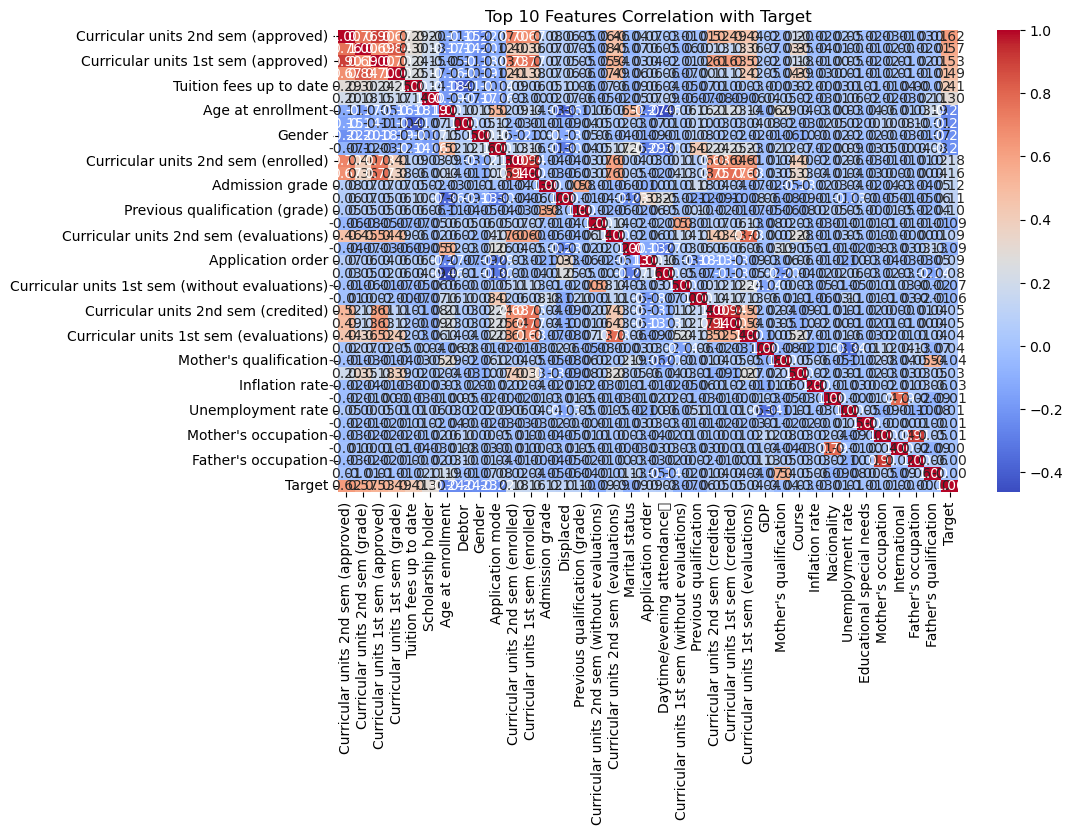

['Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Tuition fees up to date',
 'Scholarship holder',
 'Age at enrollment',
 'Debtor',
 'Gender',
 'Application mode',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 1st sem (enrolled)',
 'Admission grade',
 'Displaced',
 'Previous qualification (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Curricular units 2nd sem (evaluations)',
 'Marital status',
 'Application order',
 'Daytime/evening attendance\t',
 'Curricular units 1st sem (without evaluations)',
 'Previous qualification',
 'Curricular units 2nd sem (credited)',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (evaluations)',
 'GDP',
 "Mother's qualification",
 'Course',
 'Inflation rate',
 'Nacionality',
 'Unemployment rate',
 'Educational special needs',
 "Mother's occupation",
 'International',
 "Father's occupation",
 "Father's qu

In [79]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 计算所有变量与目标变量的相关性（使用 Point-Biserial 相关系数）
correlations = {}
for col in X.columns:
    if col != "const":  # 排除截距项
        corr = np.corrcoef(X[col], Y)[0, 1]  # 计算相关系数
        correlations[col] = corr

# 将相关性排序，选择绝对值最高的前 10 个变量
top_features = sorted(correlations, key=lambda x: abs(correlations[x]), reverse=True)

# 绘制热图展示前 10 个变量与目标变量的相关性
corr_matrix = df[top_features + ["Target"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 10 Features Correlation with Target")
plt.show()

# 返回前 10 个最相关的变量
top_features

In [80]:
# 归一化数据

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# 训练 Multinomial Logit
model = sm.MNLogit(Y_multi, sm.add_constant(X_scaled))
result = model.fit()

# 输出优化后的结果
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.579225
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:                 4424
Model:                        MNLogit   Df Residuals:                     4358
Method:                           MLE   Df Model:                           64
Date:                Sat, 15 Mar 2025   Pseudo R-squ.:                  0.4321
Time:                        15:46:57   Log-Likelihood:                -2562.5
converged:                       True   LL-Null:                       -4511.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
  Target=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0635      0.069     -0.920      0.358      -0.199       0.072
x1             0.0814      0.

In [86]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.sandbox.regression.gmm import GMM

# 确保 df 已加载
df = df.copy()  # 避免修改原数据

# **转换分类变量**
X = df.drop(columns=['Target'])  # 去掉目标变量
X = pd.get_dummies(X, columns=['Course'])  # 处理因子变量
X = sm.add_constant(X)  # 添加截距项
X = X.astype(float)  # **确保所有列都是 float 类型**

# **确保目标变量是数值**
y = df['Target'].astype(float).values  # 转换为 float 类型

# 自定义 GMM 矩条件（moment conditions）
class MyGMM(GMM):
    def momcond(self, params):
        beta = params
        errors = self.endog - np.dot(self.exog, beta)
        return errors[:, None] * self.exog  # 计算矩条件

# 初始化 GMM (修正 instrument 参数)
gmm_model = MyGMM(y, X, instrument=X)  # 传入 instrument 变量
params0 = np.zeros(X.shape[1])  # 初始参数值
gmm_results = gmm_model.fit(start_params=params0, optim_method='bfgs')

# 输出结果
print(gmm_results.summary())

Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 202
         Function evaluations: 213
         Gradient evaluations: 213
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 56
         Function evaluations: 59
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                                MyGMM Results                                 
Dep. Variable:                      y   Hansen J:                    2.413e-07
Model:                          MyGMM   Prob (Hansen J):                   nan
Method:                           GMM                                         

In [87]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 读取数据
df = pd.read_csv("data.csv")  # 修改为你的数据路径

# 处理分类变量
categorical_cols = ["Course"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 处理目标变量
label_encoder = LabelEncoder()
df["Target"] = label_encoder.fit_transform(df["Target"])  # 0, 1, 2

# 归一化数值变量
num_cols = [col for col in df.columns if col != "Target"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 训练集 & 测试集划分
X = df.drop(columns=["Target"]).values
y = df["Target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 转换为 PyTorch 张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# **定义神经网络**
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 3)  # 3 类分类
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# **初始化模型**
input_dim = X_train.shape[1]
model = NeuralNet(input_dim)

# **定义损失函数 & 优化器**
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# **训练模型**
epochs = 100
batch_size = 32
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# **测试模型**
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predicted = torch.argmax(test_outputs, axis=1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f"Test Accuracy: {accuracy:.4f}")

KeyError: "None of [Index(['Course'], dtype='object')] are in the [columns]"